Dataset Overview:
   Unnamed: 0  cgpa     iq  placement
0           0   6.8  123.0          1
1           1   5.9  106.0          0
2           2   5.3  121.0          0
3           3   7.4  132.0          1
4           4   5.8  142.0          0

Checking for missing values:
Unnamed: 0    0
cgpa          0
iq            0
placement     0
dtype: int64

Logistic Regression Results:
Accuracy: 0.9333333333333333
F1 Score: 0.9285714285714286
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.87      0.93        15

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30


K-Nearest Neighbors Results:
Accuracy: 0.9
F1 Score: 0.896551724137931
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.93      0.87      0.90        

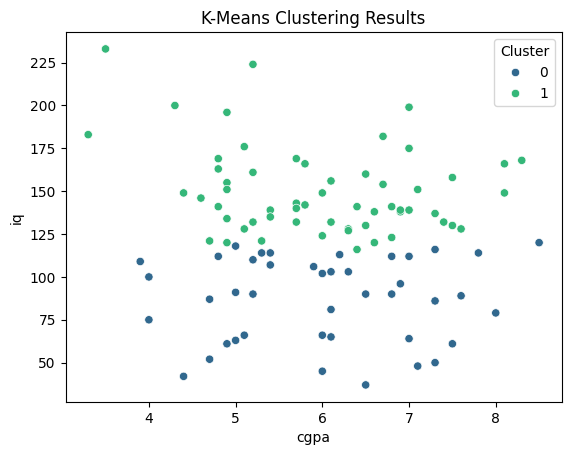

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv(r"E:\FABIZ\ML project\placement-dataset.csv")  # Path to dataset file

# Display the first few rows of the dataset
print("Dataset Overview:")
print(data.head())

# Step 1: Check for missing values and data types
print("\nChecking for missing values:")
print(data.isnull().sum())

# Step 2: Encode categorical columns (if any)
# Example: Suppose 'placement' is the target and is categorical
label_encoder = LabelEncoder()
data['placement'] = label_encoder.fit_transform(data['placement'])  # Encode 'Yes'/'No' as 1/0

# Step 3: Separate features and target
X = data.drop(columns=['placement'])  # Features
y = data['placement']                # Target (placement status)

# Step 4: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Initialize models
log_reg = LogisticRegression()
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
kmeans = KMeans(n_clusters=2)  # Assuming we want 2 clusters for placement prediction

# Step 7: Train and test each model

# Logistic Regression
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("F1 Score:", f1_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

# K-Nearest Neighbors (KNN)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("\nK-Nearest Neighbors Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

# Decision Tree
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)
print("\nDecision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("F1 Score:", f1_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

# Random Forest
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# K-Means Clustering (Unsupervised)
kmeans.fit(X)
data['Cluster'] = kmeans.labels_
print("\nK-Means Clustering Results:")
print("Cluster Centers:\n", kmeans.cluster_centers_)

# Prepare DataFrame for plotting
X_df = pd.DataFrame(X, columns=['cgpa', 'iq'])  # Replace column names with actual feature names
X_df['Cluster'] = kmeans.labels_  # Add cluster labels to the DataFrame

# Plot using seaborn
sns.scatterplot(data=X_df, x='cgpa', y='iq', hue='Cluster', palette="viridis")
plt.title("K-Means Clustering Results")
plt.show()

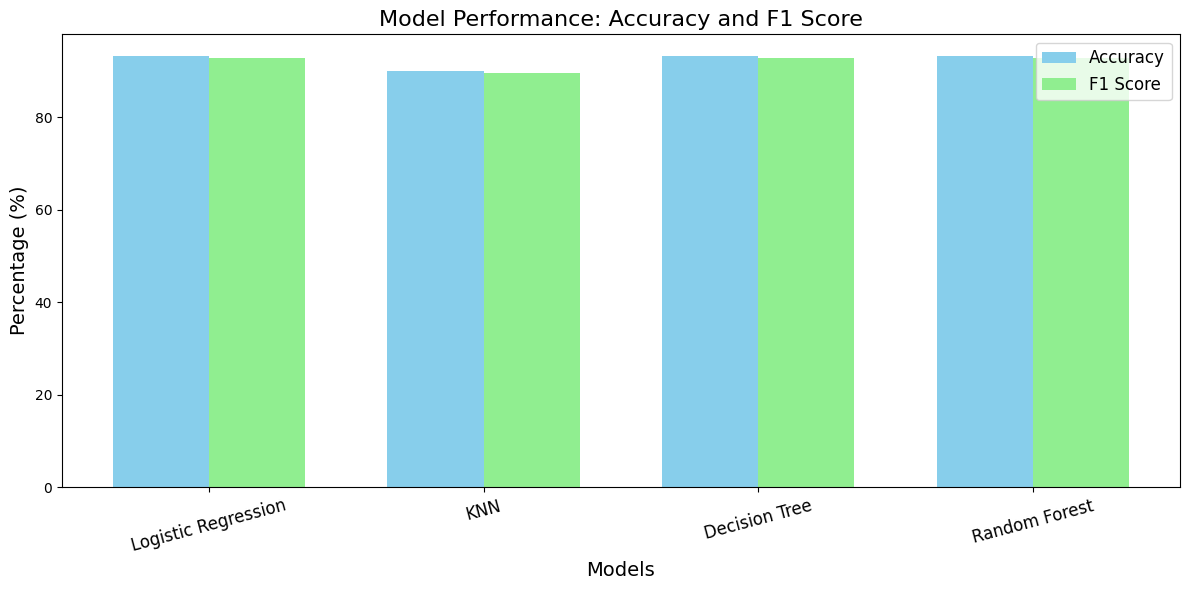

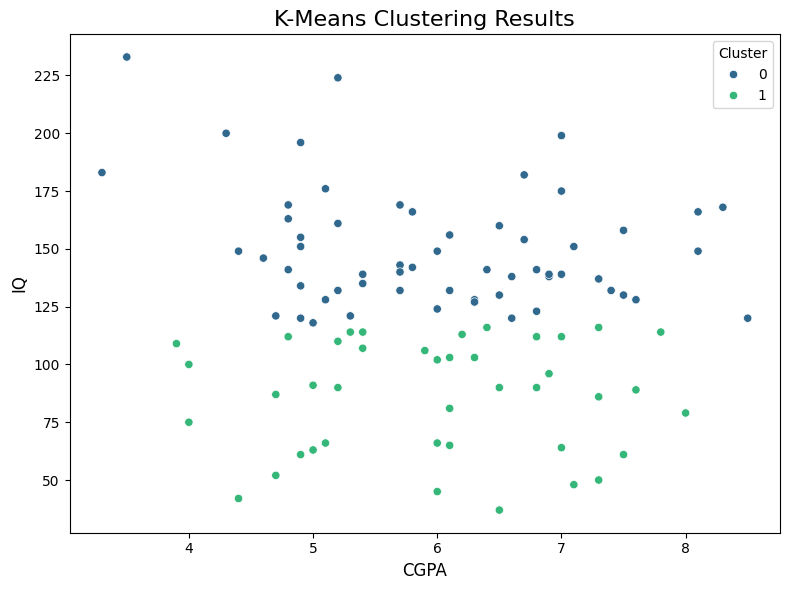

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Load dataset
data = pd.read_csv(r"E:\FABIZ\MASTER II\ML project\placement-dataset.csv")

# Supervised model results summary
model_results = {
    "Model": ["Logistic Regression", "KNN", "Decision Tree", "Random Forest"],
    "Accuracy": [93.3, 90.0, 93.3, 93.3],
    "F1 Score": [92.9, 89.7, 92.9, 92.9]
}
results_df = pd.DataFrame(model_results)

# Bar chart for accuracy and F1 score comparison
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(results_df))

# Accuracy Bar
plt.bar(index, results_df['Accuracy'], bar_width, label='Accuracy', color='skyblue')

# F1 Score Bar
plt.bar(index + bar_width, results_df['F1 Score'], bar_width, label='F1 Score', color='lightgreen')

# Labels and legend
plt.xlabel('Models', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.title('Model Performance: Accuracy and F1 Score', fontsize=16)
plt.xticks(index + bar_width / 2, results_df['Model'], fontsize=12, rotation=15)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# K-Means clustering
X = data[['cgpa', 'iq']].values
kmeans = KMeans(n_clusters=2, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# Scatter plot for clustering results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['cgpa'], y=data['iq'], hue=data['Cluster'], palette="viridis")
plt.title("K-Means Clustering Results", fontsize=16)
plt.xlabel("CGPA", fontsize=12)
plt.ylabel("IQ", fontsize=12)
plt.legend(title="Cluster", fontsize=10)
plt.tight_layout()
plt.show()
